# StatFin25 Workshop

## Financial Statistics using Julia

### 16-17th Dec, 2025

#### Instructor: Sourish

**Notebook 1**

In [1]:
import Pkg;
Pkg.add(["Random","Distributions", "Plots", "Statistics", "CRRao","StatsBase","StaticTools","GLM"
        , "DataFrames", "TimeSeries", "ShiftedArrays","RDatasets", "CSV"
        , "FinancialDerivatives", "MIToS","PortfolioAnalytics","YFinance","HypothesisTests"
        , "JuMP", "OSQP"])


    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
     Project No packages added to or removed from `~/.julia/environments/v1.12/Project.toml`
    Manifest No packages added to or removed from `~/.julia/environments/v1.12/Manifest.toml`


In [2]:
using Random, Distributions, Plots, Statistics, CRRao, DataFrames, TimeSeries, FinancialDerivatives, MIToS
using HypothesisTests, PortfolioAnalytics, StatsBase, StaticTools

In [3]:
using Random
Random.seed!(1234)

# Generate 1000 random numbers from a normal distribution (mean=0, std=1)
r = rand(Normal(0, 1), 1000)

1000-element Vector{Float64}:
  0.9706563288552144
 -0.9792184115351997
  0.9018608835940937
 -0.03280312924463938
 -0.6007922233555612
 -1.445177115286233
  2.7074239417157804
  1.5244478634355956
  0.759804020007466
 -0.8814369061964817
  0.7059931337826102
  1.0915552820534098
  0.871497852880908
  ⋮
  0.6530055215854716
  0.5544425749762509
 -1.0486579479852471
  0.7364167064633866
  0.1919443562483462
  0.764671095596252
  0.4605476610190263
 -1.4553495505882335
 -0.731679798166314
 -0.4632854431188943
  0.5112192754137074
 -1.2911234902314417

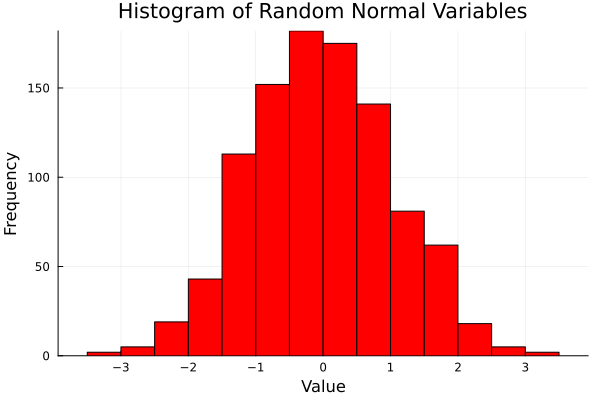

In [4]:
# Create a histogram of the generated numbers with red bars
histogram(r, color=:red, title="Histogram of Random Normal Variables"
           , xlabel="Value", ylabel="Frequency", legend = :none)

**Arithmetic expression and Standard Calculation**

The machine knows that two plus two makes four. It also knows how to do other standard calculations like:

In [5]:
2+2

4

In [6]:
exp(-2)

0.1353352832366127

In [7]:
π

π = 3.1415926535897...

In [8]:
cos(π/3)

0.5000000000000001

#### Assignments

In [9]:
## Traditional programming language

x = 2
y = 3
x+y


5

In [10]:
## Julia allows

α = 2
β = 3

α + β 

5

In [11]:
## Julia also allows ....

ক = 2
খ = 3

ক + খ

5

#### Download data from Yahoo finance

In [12]:
using YFinance
using DataFrames

# --- Define Parameters ---
ticker = "^NSEI"
# Use 'range' keyword for relative time periods like "2y", "5y", "3mo", etc.
download_range = "2y" 

# --- Download Data ---
println("Downloading Nifty 50 data for the last 2 years using 'range' parameter...")

# Call get_prices with the correct keyword argument: range
nifty_data_dict = get_prices(ticker, range = download_range)



OrderedCollections.OrderedDict{String, Union{Vector{Float64}, Vector{DateTime}, String}} with 8 entries:
  "ticker"    => "^NSEI"
  "timestamp" => [DateTime("2023-12-18T03:45:00"), DateTime("2023-12-19T03:45:0…
  "open"      => [21434.8, 21477.7, 21543.5, 21033.9, 21295.8, 21365.2, 21497.7…
  "high"      => [21482.8, 21505.1, 21593.0, 21288.3, 21390.5, 21477.2, 21675.8…
  "low"       => [21365.3, 21337.8, 21087.3, 20976.8, 21232.4, 21329.4, 21495.8…
  "close"     => [21418.7, 21453.1, 21150.2, 21255.1, 21349.4, 21441.3, 21654.8…
  "adjclose"  => [21418.7, 21453.1, 21150.2, 21255.1, 21349.4, 21441.3, 21654.8…
  "vol"       => [249700.0, 249800.0, 363900.0, 277500.0, 284700.0, 219500.0, 2…

In [13]:
# Extract the data columns (the values)
# We can select 'open', 'high', 'low', 'close', 'adjclose', and 'vol'
data_values = hcat(
    nifty_data_dict["open"],
    nifty_data_dict["high"],
    nifty_data_dict["low"],
    nifty_data_dict["close"],
    nifty_data_dict["adjclose"],
    nifty_data_dict["vol"]
)


494×6 Matrix{Float64}:
 21434.8  21482.8  21365.3  21418.7  21418.7  249700.0
 21477.7  21505.1  21337.8  21453.1  21453.1  249800.0
 21543.5  21593.0  21087.3  21150.2  21150.2  363900.0
 21033.9  21288.3  20976.8  21255.1  21255.1  277500.0
 21295.8  21390.5  21232.4  21349.4  21349.4  284700.0
 21365.2  21477.2  21329.4  21441.3  21441.3  219500.0
 21497.7  21675.8  21495.8  21654.8  21654.8  256500.0
 21715.0  21801.4  21678.0  21778.7  21778.7  393100.0
 21737.7  21770.3  21676.9  21731.4  21731.4  270900.0
 21727.8  21834.3  21680.8  21741.9  21741.9  154000.0
 21751.3  21755.6  21555.7  21665.8  21665.8  263700.0
 21661.1  21677.0  21500.3  21517.3  21517.3  311900.0
 21605.8  21685.7  21564.6  21658.6  21658.6  339200.0
     ⋮                                             ⋮
 26237.4  26280.8  26172.4  26202.9  26202.9  202500.0
 26325.8  26325.8  26124.2  26175.8  26175.8  213800.0
 26087.9  26154.6  25997.8  26032.2  26032.2  254800.0
 26004.9  26066.4  25891.0  25986.0  25986.0

In [14]:
# Define the column names
colnames = [:Open, :High, :Low, :Close, :AdjClose, :Volume]

6-element Vector{Symbol}:
 :Open
 :High
 :Low
 :Close
 :AdjClose
 :Volume

In [15]:
# Extract the DateTime index (the row names)
index = nifty_data_dict["timestamp"]

# Construct the TimeArray
nifty_ta = TimeArray(index, data_values, colnames)

494×6 TimeArray{Float64, 2, DateTime, Matrix{Float64}} 2023-12-18T03:45:00 to 2025-12-15T03:45:00
┌─────────────────────┬─────────┬─────────┬─────────┬─────────┬──────────┬──────
│                     │ Open    │ High    │ Low     │ Close   │ AdjClose │ Vol ⋯
├─────────────────────┼─────────┼─────────┼─────────┼─────────┼──────────┼──────
│ 2023-12-18T03:45:00 │ 21434.8 │ 21482.8 │ 21365.3 │ 21418.7 │  21418.7 │ 249 ⋯
│ 2023-12-19T03:45:00 │ 21477.7 │ 21505.1 │ 21337.8 │ 21453.1 │  21453.1 │ 249 ⋯
│ 2023-12-20T03:45:00 │ 21543.5 │ 21593.0 │ 21087.3 │ 21150.2 │  21150.2 │ 363 ⋯
│ 2023-12-21T03:45:00 │ 21033.9 │ 21288.3 │ 20976.8 │ 21255.1 │  21255.1 │ 277 ⋯
│ 2023-12-22T03:45:00 │ 21295.8 │ 21390.5 │ 21232.4 │ 21349.4 │  21349.4 │ 284 ⋯
│ 2023-12-26T03:45:00 │ 21365.2 │ 21477.2 │ 21329.4 │ 21441.3 │  21441.3 │ 219 ⋯
│ 2023-12-27T03:45:00 │ 21497.7 │ 21675.8 │ 21495.8 │ 21654.8 │  21654.8 │ 256 ⋯
│ 2023-12-28T03:45:00 │ 21715.0 │ 21801.4 │ 21678.0 │ 21778.7 │  21778.7 │ 393 ⋯
│ 2023-12-2

In [16]:
# Convert to DataFrame for easier printing/analysis
nifty_df = DataFrame(nifty_ta);
last(nifty_df,5)

5×7 DataFrame
 Row │ timestamp            Open     High     Low      Close    AdjClose  Volu ⋯
     │ DateTime             Float64  Float64  Float64  Float64  Float64   Floa ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2025-12-09T03:45:00  25867.1  25923.7  25728.0  25839.7   25839.7  2760 ⋯
   2 │ 2025-12-10T03:45:00  25864.1  25947.7  25734.6  25758.0   25758.0  2079
   3 │ 2025-12-11T03:45:00  25771.4  25922.8  25693.2  25898.6   25898.6  2061
   4 │ 2025-12-12T03:45:00  25971.2  26057.6  25938.4  26046.9   26046.9  2163
   5 │ 2025-12-15T03:45:00  25930.1  26047.2  25904.8  26027.3   26027.3  1816 ⋯
                                                                1 column omitted

In [17]:
println("\nSuccessfully created TimeArray and DataFrame.")
println("Last 5 rows of Nifty Data:")
println(last(nifty_df, 5))
println("\nDimensions: $(size(nifty_df))")


Successfully created TimeArray and DataFrame.
Last 5 rows of Nifty Data:
5×7 DataFrame
 Row │ timestamp            Open     High     Low      Close    AdjClose  Volume   
     │ DateTime             Float64  Float64  Float64  Float64  Float64   Float64  
─────┼─────────────────────────────────────────────────────────────────────────────
   1 │ 2025-12-09T03:45:00  25867.1  25923.7  25728.0  25839.7   25839.7  276000.0
   2 │ 2025-12-10T03:45:00  25864.1  25947.7  25734.6  25758.0   25758.0  207900.0
   3 │ 2025-12-11T03:45:00  25771.4  25922.8  25693.2  25898.6   25898.6  206100.0
   4 │ 2025-12-12T03:45:00  25971.2  26057.6  25938.4  26046.9   26046.9  216300.0
   5 │ 2025-12-15T03:45:00  25930.1  26047.2  25904.8  26027.3   26027.3  181600.0

Dimensions: (494, 7)


#### Compute log-return

log-return is the consecutive differences of prices in log-scale, i.e.,
$$
r_t = \log\Big(\frac{P_t}{P_{t-1}}\Big)
$$


In [18]:
using ShiftedArrays

## Define the Adjusted Close Price column (P_t)
P_t = nifty_df.AdjClose

## Compute the Log Return using the transform function
transform!(nifty_df, 
    :AdjClose => ByRow(log) => :LogPrice, # Optional intermediate step: log(P_t)
    [:AdjClose] => ((prices) -> log.(prices ./ ShiftedArrays.lag(prices, 1))) => :LogReturn
);

first(nifty_df,5)

5×9 DataFrame
 Row │ timestamp            Open     High     Low      Close    AdjClose  Volu ⋯
     │ DateTime             Float64  Float64  Float64  Float64  Float64   Floa ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2023-12-18T03:45:00  21434.8  21482.8  21365.3  21418.7   21418.7  2497 ⋯
   2 │ 2023-12-19T03:45:00  21477.7  21505.1  21337.8  21453.1   21453.1  2498
   3 │ 2023-12-20T03:45:00  21543.5  21593.0  21087.3  21150.2   21150.2  3639
   4 │ 2023-12-21T03:45:00  21033.9  21288.3  20976.8  21255.1   21255.1  2775
   5 │ 2023-12-22T03:45:00  21295.8  21390.5  21232.4  21349.4   21349.4  2847 ⋯
                                                               3 columns omitted

In [19]:
# Handle the first row (which is always missing/NaN)
# The first log return is NaN because there is no previous price (P_{t-1})
# We fill it with 0.0 for cleaner analysis.
nifty_df[1, :LogReturn] = 0.0

0.0

In [20]:
println("DataFrame with new LogReturn column:")
println(first(nifty_df[!, [:AdjClose, :LogReturn]], 5))


DataFrame with new LogReturn column:
5×2 DataFrame
 Row │ AdjClose  LogReturn   
     │ Float64   Float64?    
─────┼───────────────────────
   1 │  21418.7   0.0
   2 │  21453.1   0.00160708
   3 │  21150.2  -0.0142221
   4 │  21255.1   0.00494753
   5 │  21349.4   0.0044291


In [21]:
## This line is very important
returns = filter(r -> !ismissing(r.LogReturn) && isfinite(r.LogReturn), nifty_df).LogReturn

492-element Vector{Union{Missing, Float64}}:
  0.0
  0.001607082806947435
 -0.014222122733049722
  0.004947534816775346
  0.004429103580375731
  0.004297627887901326
  0.009903547502138933
  0.0057075621422148105
 -0.0021741548367498844
  0.0004830551173010514
 -0.0035062758581720864
 -0.006875448193459907
  0.006543017882762483
  ⋮
 -0.0004808059270205712
 -0.001038560391932615
 -0.005499206353098099
 -0.0017762718275890193
  0.0018358417105443499
  0.005848298407896911
 -0.008663963433110109
 -0.004667959097577137
 -0.003164890577820058
  0.005441754277616313
  0.0057136360690816825
 -0.0007546316435640039

In [22]:
μ = mean(returns)
σ = std(returns)
minimum_val = minimum(returns)
maximum_val = maximum(returns)

println("Mean LogReturn: $μ")
println("Std Dev LogReturn: $σ")
println("Min LogReturn: $minimum_val")
println("Max LogReturn: $maximum_val")

Mean LogReturn: 0.00040310118984732775
Std Dev LogReturn: 0.008227972572560567
Min LogReturn: -0.06112419596275757
Max LogReturn: 0.03747214018466671


#### Compute simple return

Simple return can be calculated as:
\begin{eqnarray*}
R_t &=& \frac{P_t-P_{t-1}}{P_{t-1}}\\
&=& \Big(\frac{P_t}{P_{t-1}}\Big)-1\\
&=& e^{r_t}-1
\end{eqnarray*}

In [23]:
Return_sim = exp.(returns) .- 1

492-element Vector{Float64}:
  0.0
  0.0016083748565725031
 -0.01412146609423337
  0.004959794076523361
  0.004438926556610712
  0.004306875934107168
  0.0099527499207277
  0.005723881307796219
 -0.0021717930740454694
  0.00048317180721269004
 -0.003500136051024061
 -0.00685186637566948
  0.006564470186349425
  ⋮
 -0.0004806903583736144
 -0.0010380212747401751
 -0.005484113396941881
 -0.0017746951904364927
  0.0018375278996383138
  0.005865433091659877
 -0.00862653945989178
 -0.004657081109092687
 -0.0031598875909956137
  0.0054565875164998
  0.005729990019651465
 -0.0007543469807149705

#### K-period Simple Return

\begin{eqnarray}
R_t(k) &=& \frac{P_t - P_{t-k}}{P_{t-k}} \\
       &=& \frac{P_t}{P_{t-k}} - 1\\
1 + R_t(k) 
&=& \frac{P_t}{P_{t-k}}
= \left( \frac{P_t}{P_{t-1}} \right)
  \left( \frac{P_{t-1}}{P_{t-2}} \right)
  \cdots
  \left( \frac{P_{t-k+1}}{P_{t-k}} \right)\\
 &=& (1 + R_t)(1 + R_{t-1}) \cdots (1 + R_{t-k+1})
\end{eqnarray}



#### K-period Log Return

\begin{eqnarray}
r_t(k) &=& \log\{1 + R_t(k)\}\\
       &=& \log\{(1 + R_t)(1 + R_{t-1}) \cdots (1 + R_{t-k+1})\}\\
       &=& \log(1 + R_t) + \log(1 + R_{t-1}) + \cdots + \log(1 + R_{t-k+1})\\
       &=& r_t + r_{t-1} + \cdots + r_{t-k+1}
\end{eqnarray}

+ $k$-period log-return is the sum of $k$ single-period log-returns.
+ But $k$-period simple return cannot be expressed as easily as log-return.
+ Log-return has some other advantages as well. We will discuss them later.
+ Now onwards, we will use log-return for the rest of the workshop.

In [24]:
μ = mean(returns)

0.00040310118984732775

#### Volatility (aka. Standard Deviation)

In [25]:
## volatility of daily return

σ = std(returns)*100

0.8227972572560567

In [26]:
## volatility (annualised)

σ*√252

13.061501532753368

+ Volatility tells us, on average, how much value of an asset can go down or go up.

+ Since `std(returns)*100` is calculated using daily log-return; so calculated volatility is daily volatility in percentage.

+ So value of Nifty 50 can go down (or up) by 0.82% on a given day.

+ So value of Nifty 50 can go down (or up) by 13.07% on an yearly horizon.


#### How to compute 30-days Volatility

Suppose $r_t, r_{t-1}, \ldots, r_{t-k+1}$ are $k$ single period log-returns of an asset, where

$$
\mathbb{E}(r_{t-i+1}) = \mu \quad \forall i = 1,2,\ldots,k
$$

$$
\mathrm{Var}(r_{t-i+1}) = \sigma^2 \quad \forall i
$$

$$
\mathrm{Cov}(r_{t-i+1}, r_{t-j+1}) = 0 \quad \forall i \neq j = 1,2,\ldots,k.
$$

That is, the covariance matrix is

$$
\Sigma =
\begin{pmatrix}
\sigma^2 & 0 & \cdots & 0 \\
0 & \sigma^2 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \sigma^2
\end{pmatrix}_{k \times k}.
$$

The $k$-period return can be presented in matrix notation as

$$
r_t(k) = r_t + r_{t-1} + \cdots + r_{t-k+1}
$$

$$
= c^\top r,
$$

where $c^\top = (1,1,\ldots,1)_k$ is a unit vector of order $k$ and 
$r = \{ r_t, r_{t-1}, \ldots, r_{t-k+1} \}$.

The mean and variance of the $k$-period return are

$$
\mathbb{E}(r_t(k)) = c^\top \mu = k\mu,
$$

$$
\mathrm{Var}(r_t(k)) = c^\top \Sigma c = k \sigma^2.
$$

Therefore **$k$-period volatility** is:  $\sqrt{k}\sigma.$


#### Monthly volatility of Nifty 50

In [27]:
σ*√(22)

3.859261222573301

Why are we using $k=22$ and $k=252$ for monthly and yearly volatility of Nifty 50?

## Random Walk Hypothesis
#### Random Walk Model

**Example 1**: *Random Walk with Fixed Moves*

Suppose price of a stock move up by 10 paisa with probability 0.5 or move down by 10 paisa with probability 0.5 every seconds.

If the price of the stock is Re 1/-; then what will be the price of the stock after 21600 seconds

The model $P_t=P_{t−1}\pm M_t$, where $M_t=5$ a.s.

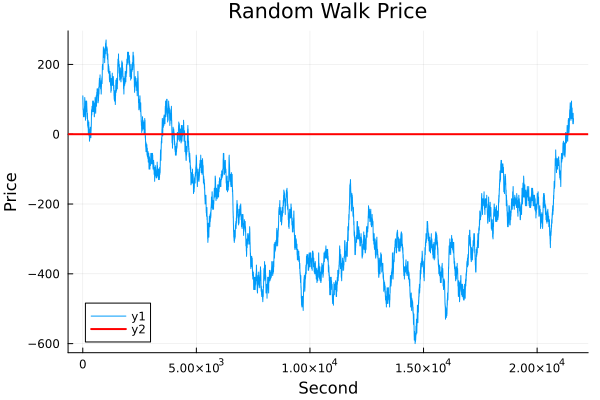

In [28]:
Random.seed!(321)

n = 21600
P = Vector{Float64}(undef, n)
P[1] = 100.0   # Current price 100 paisa or Re 1/-

for sec in 2:n
    toss = rand(('H', 'T'))   # fair coin
    if toss == 'H'
        P[sec] = P[sec-1] + 5
    else
        P[sec] = P[sec-1] - 5
    end
end

plot(P, title = "Random Walk Price", xlabel = "Second", ylabel = "Price")
hline!([0.0], lw = 2, color = :red)

+ **Notice**: Price of the stock is negative
+ This model is good candidate to model the stock price movement.
+ However, it cannot take care of the limited liability feature of the stock market.
+ **Check what happens price of the stock move up by 10 paisa with probability 0.51 or move down by 10 paisa with probability 0.49 on every seconds!**

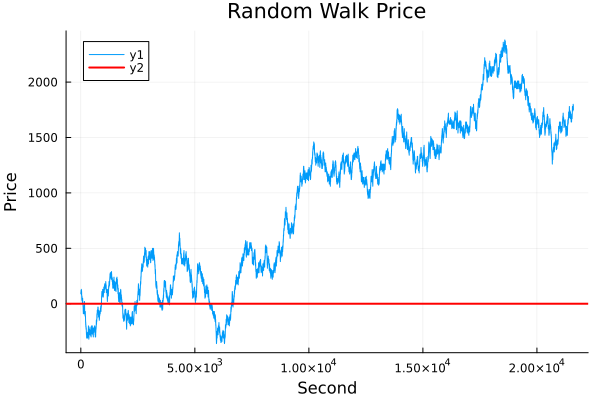

In [29]:
Random.seed!(321)

n = 21600
P = Vector{Float64}(undef, n)
P[1] = 100.0   # Current price 100 paisa or Re 1/-

for sec in 2:n
    toss = rand() < 0.51 ? 'H' : 'T'   # biased coin: P(H)=0.51, P(T)=0.49
    if toss == 'H'
        P[sec] = P[sec-1] + 10
    else
        P[sec] = P[sec-1] - 10
    end
end


plot(P, title = "Random Walk Price", xlabel = "Second", ylabel = "Price")
hline!([0.0], lw = 2, color = :red)

**Example 2**: *Random Walk with Random Moves*

Suppose price of a stock move up or down with probability 0.5 or
Size of the movement follow $Poisson(\lambda=5)$
If the price of the stock is Re 1/-; then what will be the price of the stock after 21600 seconds
The model: $P_t=P_{t-1}\pm M_t$; where $M_t \sim Poisson(\lambda=5)$


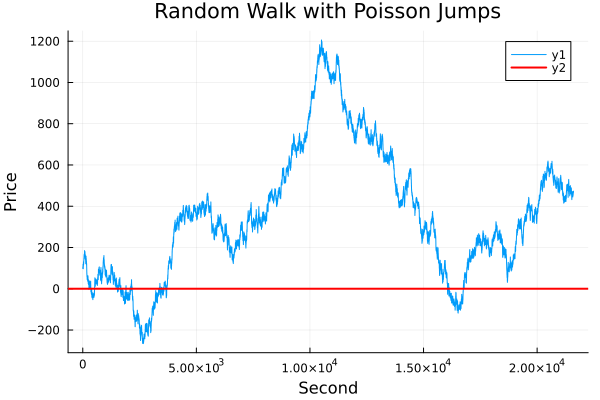

In [30]:
Random.seed!(321)

n = 21600
P = Vector{Float64}(undef, n)
M = Vector{Float64}(undef, n)

P[1] = 100.0   # starting price (paisa)

pois = Poisson(5)   # Poisson(λ = 5) distribution

for sec in 2:n
    toss = rand(('H', 'T'))            # fair coin
    M[sec] = rand(pois)                # Poisson jump size

    if toss == 'H'
        P[sec] = P[sec-1] + M[sec]
    else
        P[sec] = P[sec-1] - M[sec]
    end
end


plot(P, title = "Random Walk with Poisson Jumps", xlabel = "Second", ylabel = "Price")
hline!([0.0], lw = 2, color = :red)


**Example 3**: *Random Walk with Random Return*

+ Simple return of an asset is nothing but movement of the price with respect to previous price.

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

$$
R_t \cdot P_{t-1} = P_t - P_{t-1}
$$

$$
P_t = P_{t-1}(1 + R_t)
$$


+ Suppose $R_t \sim N(\mu = 0, \sigma = 0.01)$ on every second.
+ If the price of the stock is Re 1/-; then what will be the price of the stock after 21600 seconds?


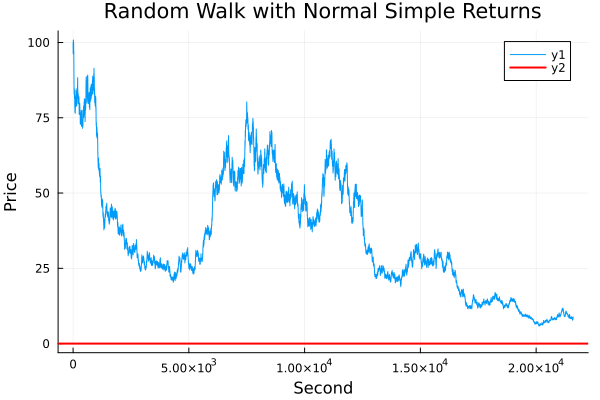

In [31]:
Random.seed!(321)

n = 21600
P = Vector{Float64}(undef, n)
P[1] = 100.0    # starting price in paisa

rt = rand(Normal(0, 0.01), n)   # simple returns

for sec in 2:n
    P[sec] = P[sec-1] * (1 + rt[sec])
end

plot(P, title = "Random Walk with Normal Simple Returns",
     xlabel = "Second", ylabel = "Price")
hline!([0.0], lw = 2, color = :red)


#### Check what happend if you choose mean= 0.01 !

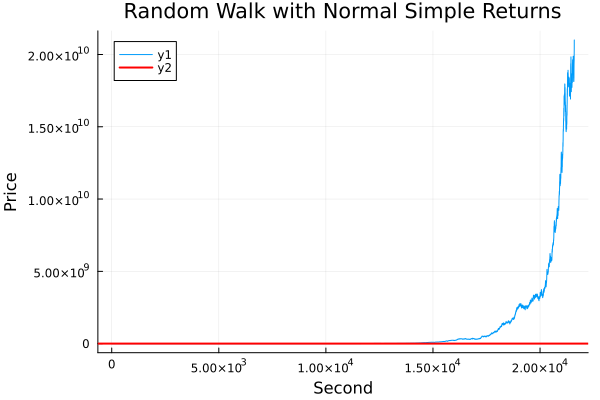

In [32]:
Random.seed!(321)

P = Vector{Float64}(undef, n)
P[1] = 100.0    # starting price in paisa

rt = rand(Normal(0.001, 0.01), n)   # simple returns

for sec in 2:n
    P[sec] = P[sec-1] * (1 + rt[sec])
end

plot(P, title = "Random Walk with Normal Simple Returns",
     xlabel = "Second", ylabel = "Price")
hline!([0.0], lw = 2, color = :red)


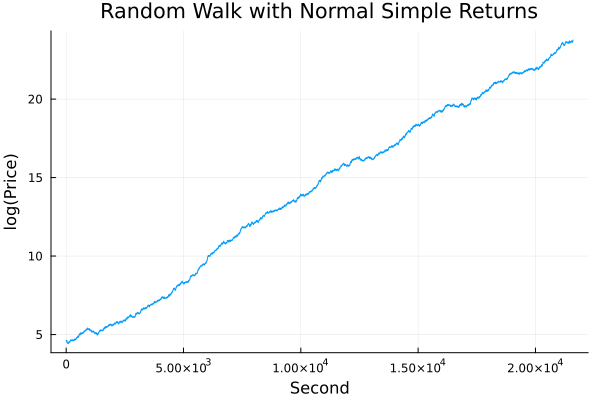

In [33]:
plot(log.(P), title = "Random Walk with Normal Simple Returns",
     xlabel = "Second", ylabel = "log(Price)", legend = :none)


**Example 4**: *Random Walk with Random log-Return*

+ The log-return of an asset indicates continuous compounding effect of the price movement;

$$
r_t = \log(P_t) - \log(P_{t-1})
$$

$$
= \log\!\left( \frac{P_t}{P_{t-1}} \right)
$$

$$
P_t = P_{t-1} e^{r_t}
$$

+ Suppose $r_t \sim N(\mu = 0,\ \sigma = 0.01)$ on every second.
+ If the price of the stock is Re 1/-, then what will be the price of the stock after 21600 seconds?


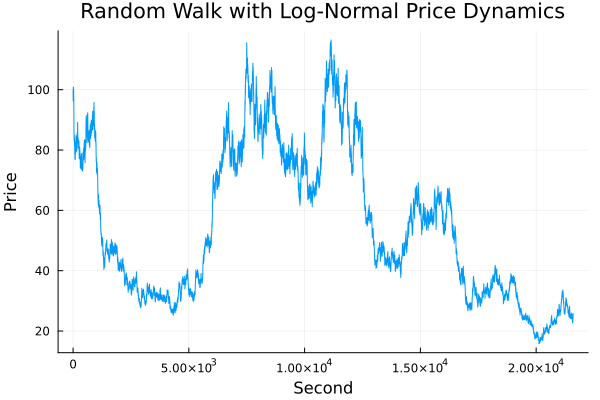

In [34]:
Random.seed!(321)
n = 21600
P = Vector{Float64}(undef, n)
P[1] = 100.0   # starting price (paisa)

rt = rand(Normal(0, 0.01), n)   # log-returns

for sec in 2:n
    P[sec] = P[sec-1] * exp(rt[sec])
end

plot(P, title = "Random Walk with Log-Normal Price Dynamics",
     xlabel = "Second", ylabel = "Price", legend = :none)

### Modeling with log-return

+ Suppose $R_1, R_2, \ldots$ are \textbf{simple return} from single investment.
+ You can make a common working assumption as the returns are mutually independent and identically distributed (i.i.d.) random variables with mean $\mu$ and variance $\sigma^2$.
+ However, this is not a good model from a theoretical perspective.
+ The model assumes $P_t$ is distributed over the real line, which means the model implies unlimited loss.
+ But typically in the world of \textbf{limited liability} structure of the companies, the loss is usually limited.
+ That is $R_t \ge -1$ means the maximum loss that an investor can experience is the total investment.
+ You see, for the log return,


$$
1 + R_t = \exp(r_t) \ge 0,
$$

which implies $R_t \ge -1$.

+ This satisfies the condition of limited liability, i.e., possible maximum loss is the total investment. In addition,

$$
1 + R_t(k)
= (1 + R_t)(1 + R_{t-1}) \cdots (1 + R_{t-k+1})
$$

$$
= \exp(r_t)\exp(r_{t-1}) \cdots \exp(r_{t-k+1})
$$

$$
= \exp(r_t + r_{t-1} + \cdots + r_{t-k+1}).
$$


+ So sum of $k$-period log-returns yields $k$-period gross return. Now note that

$$
\frac{P_t}{P_{t-k}} = 1 + R_t(k)
= \exp(r_t + r_{t-1} + \cdots + r_{t-k+1}).
$$


+ can be expressed as for $k = t$,

$$
P_t = P_0 \exp(r_t + \cdots + r_1).
$$

+ Therefore, if the log returns are assumed to be i.i.d. random variables, then the price of the stock or market index, denoted by the process $P = \{P_t : t \ge 0\}$, is the exponential of random walk or also known as \textbf{geometric random walk}.


#### Stationary Process

+ In probability, a stochastic process is known as stationary if the joint probability distribution is independent of time.
+ Parameters such as mean, volatility, correlation etc.\ do not change over time.
+ The process $P = \{P_t : t \ge 0\}$ is strongly stationary if $\forall\, h$ and $n$

$$
F_{P}(p_{t_1+h}, p_{t_2+h}, \ldots, p_{t_n+h})
=
F_{P}(p_{t_1}, p_{t_2}, \ldots, p_{t_n}),
$$

since $h$ does not affect $F_P$, it is not a function of time.

+ Note that the families $\{P(t_1), \ldots, P(t_n)\}$ and $\{P(t_1 + h), \ldots, P(t_n + h)\}$ have the same joint distribution for all $t_1, t_2, \ldots, t_n$ and $h > 0$.
+ A weak form of stationarity is defined based on the parameters of the process.
+ The (WSS) process only requires that mean and autocovariance do not vary with respect to time.
+ A continuous time random process $P_t$ is weakly stationary if it has the following restrictions on its mean function:

$$
\mathbb{E}(P_t) = \mu(t) = \mu(t + h) = \mu
\qquad \forall\, t, h \in \mathbb{R},
$$

and autocovariance function

$$
\operatorname{Cov}_{P}(t_1, t_2)
=
\mathbb{E}\!\left[(P(t_1) - \mu(t_1))(P(t_2) - \mu(t_2))\right]
=
\operatorname{Cov}_{P}(t_1 - t_2).
$$

+ The mean function $\mathbb{E}(P_t)$ must be constant over time.
+ The covariance function depends only on the difference between $t_1$ and $t_2$.
+ Distribution of log-return must be \textbf{stationary}.


### Simulate from stationary process

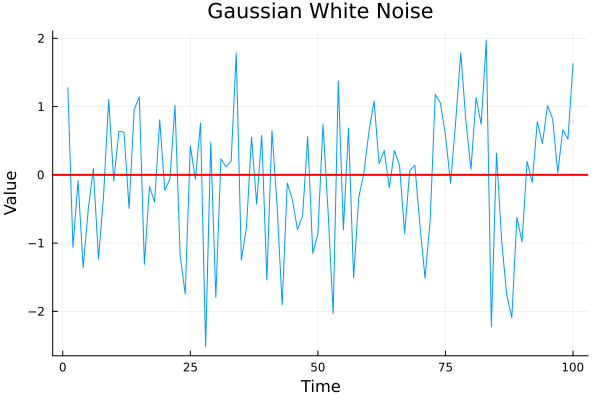

In [35]:
mu = 0
s  = 1
n  = 100

r = rand(Normal(mu, s), n)

plot(r, title = "Gaussian White Noise", xlabel = "Time", ylabel = "Value",legend = :none)
hline!([0.0], lw = 2, color = :red)


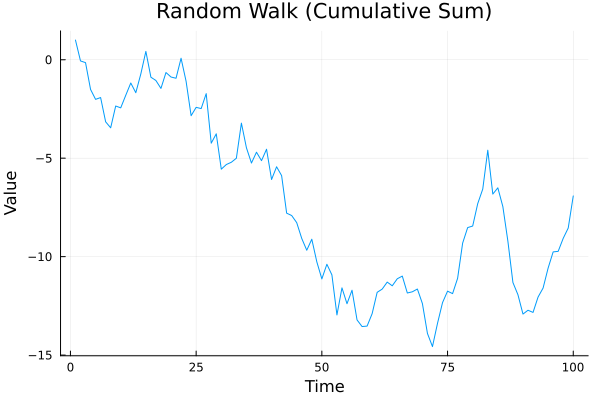

In [36]:
P = copy(r)      # start from r
P[1] = 1         # set first value to 1
P = cumsum(P)    # cumulative sum

plot(P, title = "Random Walk (Cumulative Sum)", 
     xlabel = "Time", ylabel = "Value", legend = :none)

Price is non-stationary. However, its steps are a stationary process.

### Unit Root of Random Walk

+ The random walk is said to have unit root. To understand what this means, you should consider the AR(1) model (i.e., Auto-Regressive model with lag 1),


$$
p_t = \varphi p_{t-1} + r_t
$$

where $\varphi = 1$ and $p_t = \log(P_t)$ is price of the asset in log-scale.

+ The generic AR(1) model can be presented as

\begin{eqnarray}
p_t &=& \varphi p_{t-1} + r_t\\
&=&  \varphi(\varphi p_{t-2} + r_{t-1}) + r_t\\
&=& \varphi^2 p_{t-2} + \varphi r_{t-1} + r_t\\
&=& \varphi^2(\varphi p_{t-3} + r_{t-2}) + \varphi r_{t-1} + r_t\\
&=& \varphi^3 p_{t-3} + \varphi^2 r_{t-2} + \varphi r_{t-1} + r_t\\
&\vdots&\\
&=& \varphi^k p_{t-k} + \varphi^{k-1} r_{t-(k-1)} + \cdots + \varphi r_{t-1} + r_t\\
&=& \varphi^k p_{t-k} + \sum_{i=0}^{k-1} \varphi^{i} r_{t-(i)}.
\end{eqnarray}


+ If $\varphi = 1$ then the process is non-stationary. Because $\sum_{i=0}^{k-1} \varphi^{i} r_{t-i}$ accumulates the information over time. \textbf{Hence a random walk is a non-stationary process.}
+ However if $|\varphi| < 1$, i.e., $-1 < \varphi < 1$ implies the process is stationary.
+ If $\varphi = 0$ that means the process is stationary and $p_t$ and $p_{t-1}$ are independent $\forall t$.
+ As the series $\{p_t : t \ge 0\}$ is a random walk (i.e., $\varphi = 1$), the incremental steps (i.e., log-returns) are independent and stationary process. You can write it as


$$
r_t = \varphi_1 r_{t-1} + \epsilon_t
$$


where $\varphi_1 = 0$ and $\epsilon_t$ is white noise with mean $\mu$ and variance $\sigma^2$.

+ In order to check if the price of a stock follows the geometric random walk, you have to check three things.
+ First, you should check if $\{p_t\}$ is a non-stationary process, i.e.,


$$
p_t = \varphi p_{t-1} + r_t;
$$

check if $\varphi = 1$ or $\varphi < 1$.

+ Second, you check if the log-returns are stationary process, i.e.,

$$
r_t = \varphi_1 r_{t-1} + \epsilon_t;
$$

check if $\varphi_1 = 1$ or $\varphi_1 < 1$.

+ Third, second check only tells you if log-returns are stationary, but it does not check if $\varphi_1 = 0$ or not. In addition $\varphi_1 = 0$ only implies pairwise independence. It does not check the mutual independence of $r_t$. So you should check if the serial correlations of $r_t$ are 0 or not. That is check if 

$$
Q_1 = Q_2 = \cdots = Q_h = 0,
$$


where $Q_h = \operatorname{corr}(r_t, r_{t+h})$ is the lag-$h$ autocorrelation.


#### Dickey-Fuller test for Stationarity in a Time Series

+ The Dickey–Fuller test (1979) compares the null hypothesis

$$
H_0 : p_t = p_{t-1} + r_t
$$


i.e., that the series is a random walk without drift, where $r_t$ is a white noise with mean $0$ and variance $\sigma^2$.

+ The alternative hypothesis is

$$
H_1 : p_t = \mu + \varphi p_{t-1} + r_t
$$

where $\mu$ and $\varphi$ are constant with $|\varphi| < 1$.

+ According to $H_1$, the process is stationary AR(1) with mean


$$
\frac{\mu}{1 - \varphi}.
$$

+ You can implement the Augmented Dickey–Fuller test using `ADFTest`.



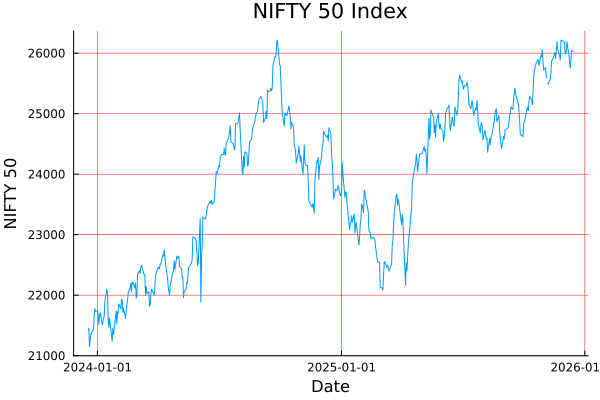

In [37]:
plot(
    nifty_df.timestamp,
    nifty_df.AdjClose,
    title = "NIFTY 50 Index",
    xlabel = "Date",
    ylabel = "NIFTY 50",
    legend = false,
    grid = true,     
    gridalpha = 1.0,   
    gridcolor = :red    
)


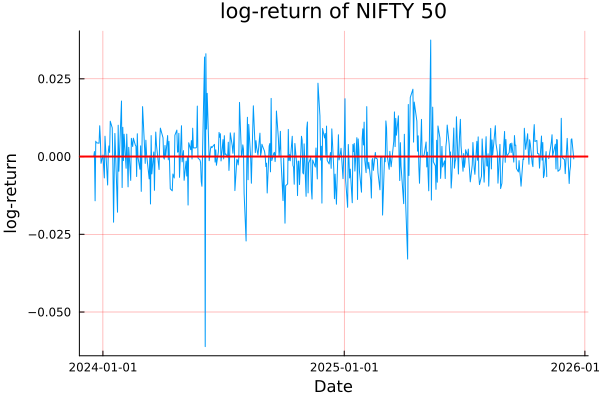

In [38]:
plot(
    nifty_df.timestamp,
    nifty_df.LogReturn,
    title = "log-return of NIFTY 50",
    xlabel = "Date",
    ylabel = "log-return",
    legend = false,
    grid = true,     
    gridalpha = 0.5,   
    gridcolor = :red    
)
hline!([0.0], lw = 2, color = :red)



In [39]:
using HypothesisTests

# Clean AdjClose
AdjClose_raw = nifty_df.AdjClose
AdjClose_nomis = collect(skipmissing(AdjClose_raw))
clean_price = AdjClose_nomis[isfinite.(AdjClose_nomis)]

# Log-price
log_price = log.(clean_price)

# ADF test with deterministic = :none
lag = 1
result = ADFTest(log_price, :none, lag)

println(result)


Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          4.26307e-5

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.9360

Details:
    sample size in regression:          491
    number of lags:                     1
    ADF statistic:                      1.15931
    Critical values at 1%, 5%, and 10%: adjoint([-2.57029, -1.94156, -1.61629])



The data are entirely consistent with the hypothesis that the price (or log-price) follows a random walk (non-stationary).

This matches textbook financial econometrics: $P_t$ or $\log(P_{t})$ : non-stationary, has a unit root

$r_t$: stationary (your earlier test with `p-value < 1e-26`)

In [40]:
# Start from your LogReturn column
log_return_raw = nifty_df.LogReturn

# Remove missings
log_return_nomis = collect(skipmissing(log_return_raw))   # Vector{Float64}

# Remove NaN / Inf (non-finite) values
log_return = log_return_nomis[isfinite.(log_return_nomis)]

# Run ADF test on log-retun
lag = 1
result = ADFTest(log_return, :none, lag)


Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -1.03757

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-26

Details:
    sample size in regression:          490
    number of lags:                     1
    ADF statistic:                      -15.4893
    Critical values at 1%, 5%, and 10%: adjoint([-2.5703, -1.94156, -1.61629])


This means:

NIFTY log-returns are stationary.

They satisfy the properties:

 + constant mean

 + constant variance

 + rapidly decaying autocorrelations

 + no random-walk drift component

#### Ljung–Box test for independence in a Time Series

+ The null hypothesis is $Q_h = 0$ for all $h$. That is,

$$
H_0 : Q_1 = Q_2 = \cdots = Q_H = 0 \ \forall\, t,
$$

$$
H_1 : \text{At least one inequality.}
$$

+ The test statistic for the Ljung–Box test is

$$
Q \;=\; n(n+2)\sum_{h=1}^{H} \frac{\hat{Q}_h^{\,2}}{n-h},
$$

where $n$ is the sample size, and $\hat{Q}_h$ is the sample autocorrelation of lag $h$.

+ You can show under $H_0$, $Q$ follows a chi-square distribution, $\chi^2_{(h)}$.
+ The Ljung–Box test can be done in `R` using the `BoxPierceTest` function available in the `HypothesisTests.jl` package.



In [41]:
bp = BoxPierceTest(log_return, 10)
println(bp)


Box-Pierce autocorrelation test
-------------------------------
Population details:
    parameter of interest:   autocorrelations up to lag k
    value under h_0:         "all zero"
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           0.0155

Details:
    number of observations:         492
    number of lags:                 10
    degrees of freedom correction:  0
    Q statistic:                    21.9178



What does this mean?
Null hypothesis ($H_0$):

All autocorrelations up to lag 10 are zero $\rightarrow$ the series is white noise (independent).

Alternative ($H_1$):

At least one autocorrelation is nonzero $\rightarrow$ the series shows dependence.

**Interpretation for NIFTY log-returns**

Since `p-value < 0.05`, we reject the null of independence.

This means:

+ There is mild autocorrelation in the log-return series

+ typically at short lags (1 or 2 days/periods)


Financial returns are mostly uncorrelated, but not perfectly independent.
Equity indices sometimes show:

+ tiny AR(1) effects (very small positive or negative)

+ volatility clustering (large |returns| follow large |returns|)

+ slight market microstructure noise


### Compute Ljung–Box test (more accurate in finite samples)

In [42]:
lb = LjungBoxTest(log_return, 10)
println(lb)


Ljung-Box autocorrelation test
------------------------------
Population details:
    parameter of interest:   autocorrelations up to lag k
    value under h_0:         "all zero"
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           0.0140

Details:
    number of observations:         492
    number of lags:                 10
    degrees of freedom correction:  0
    Q statistic:                    22.2312



### Plot ACF to show which lags cause rejection



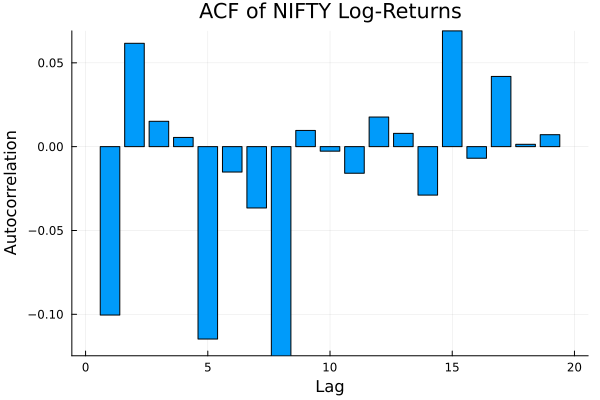

In [43]:
using StatsBase, Plots

# ACF for all lags
acf_all = autocor(log_return)

# Extract first 10 lags (skip lag 0)
acf_vals = acf_all[2:20]

bar(acf_vals,
    title = "ACF of NIFTY Log-Returns",
    xlabel = "Lag",
    ylabel = "Autocorrelation",
    legend = false
)


#### Partial Autocorrelation (PACF)

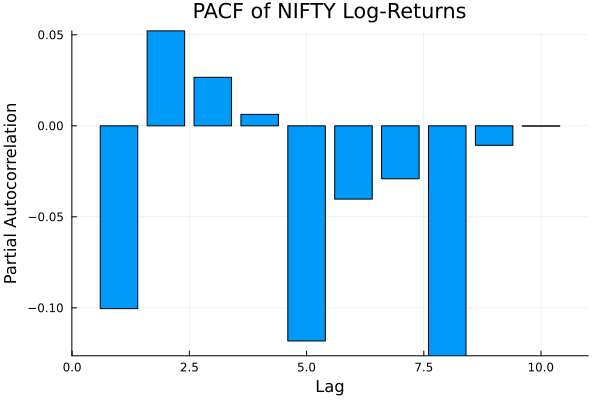

In [44]:
# Choose the number of lags
H = 10

# PACF requires a vector of lag indices
lagvec = 1:H

pacf_vals = pacf(log_return, lagvec)

bar(pacf_vals,
    title = "PACF of NIFTY Log-Returns",
    xlabel = "Lag",
    ylabel = "Partial Autocorrelation",
    legend = false
)

**Interpretation for NIFTY log-returns**

Since `p-value < 0.05`, we reject the null of independence.

This means:

+ There is mild autocorrelation in the log-return series
    
# Is **Market efficient**?